### Covid-19 Regression Statistics using Python

by H. Knospe

In [1]:
import numpy as np
import scipy.integrate as sci
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import ScalarFormatter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
# Get data from Github
# Data Repository by Johns Hopkins CSSE
# re-run daily to get up-to-date information
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
# new
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)

population = pd.read_csv('Population.csv',sep=';')

In [3]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum()

In [4]:
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [5]:
# deaths in Germany
scdata=deathcountry.loc[deathcountry['Country/Region']=='Germany'].values[:,3:][0]
print(scdata)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 3 3 7 9 11 17 24 28 44 67 84 94 123 157 206 267
 342 433 533 645 775 920 1107 1275 1444 1584 1810 2016 2349 2607 2767 2736
 3022 3194 3294 3804 4052 4352 4459 4586 4862 5033 5279 5575 5760 5877
 5976 6126 6314 6467 6623 6736 6812 6866 6993 6993 7275 7392 7510 7549
 7569 7661 7738 7861 7884 7897 7938]


In [6]:
# cases in Germany from 15 March
scdata=confirmedcountry.loc[confirmedcountry['Country/Region']=='Germany'].values[:,57:][0]
print(scdata)

[7272 9257 12327 15320 19848 22213 24873 29056 32986 37323 43938 50871
 57695 62095 66885 71808 77872 84794 91159 96092 100123 103374 107663
 113296 118181 122171 124908 127854 130072 131359 134753 137698 141397
 143342 145184 147065 148291 150648 153129 154999 156513 157770 158758
 159912 161539 163009 164077 164967 165664 166152 167007 168162 169430
 170588 171324 171879 172576 173171 174098 174478 175233 175752]


In [7]:
# Regression
lr = LinearRegression()
pr = LinearRegression()
d=np.arange(scdata.size).reshape(-1, 1)

# try degree=2
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(d)
lr.fit(d, scdata)
pr.fit(X_quad, scdata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# 14 days forecast
d_fit = np.arange(0,scdata.size+14)[:, np.newaxis]
y_lin_fit = lr.predict(d_fit)
linear_r2 = r2_score(scdata, lr.predict(d))

y_poly_fit = pr.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(scdata, pr.predict(X_quad))
# coefficients of the regression polynomial
print(pr.coef_)
# R^2 score
print("Linear R^2 =",linear_r2)
print("Polynomial R^2 =",quad_r2)

[   0.         6232.594762    -54.52903399]
Linear R^2 = 0.9126394080456218
Polynomial R^2 = 0.9948839010328983


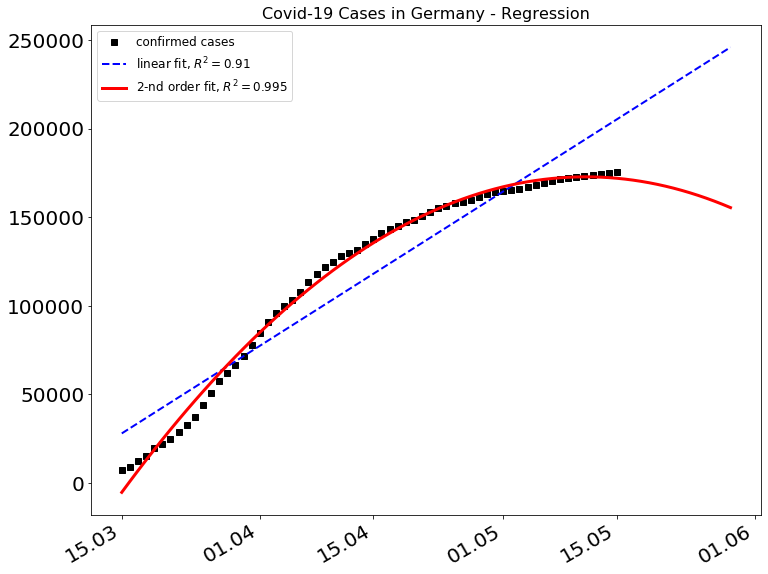

In [12]:
zerodate = datetime.datetime(2020, 3, 15)
d = confirmed.columns.size-58
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]
date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,scdata,'s',color='black',label='confirmed cases')
ax.plot(date, y_lin_fit,label='linear fit, $R^2=%.2f$' % linear_r2, linestyle='--', color='blue', linewidth=2 )
ax.plot(date, y_poly_fit,label='$2$-nd order fit, $R^2=%.3f$' % quad_r2, linestyle='-', color='red', linewidth=3)
ax.legend(loc='upper left',fontsize=12)
ax.set_title('Covid-19 Cases in Germany - Regression',fontsize=16)
ax.tick_params(labelsize=20)
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()